In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
original_data = pd.read_csv("heart_disease_dataset.csv")
data = original_data.copy()
data.head()


,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [30]:
# we will first check if the data is clean 
data.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


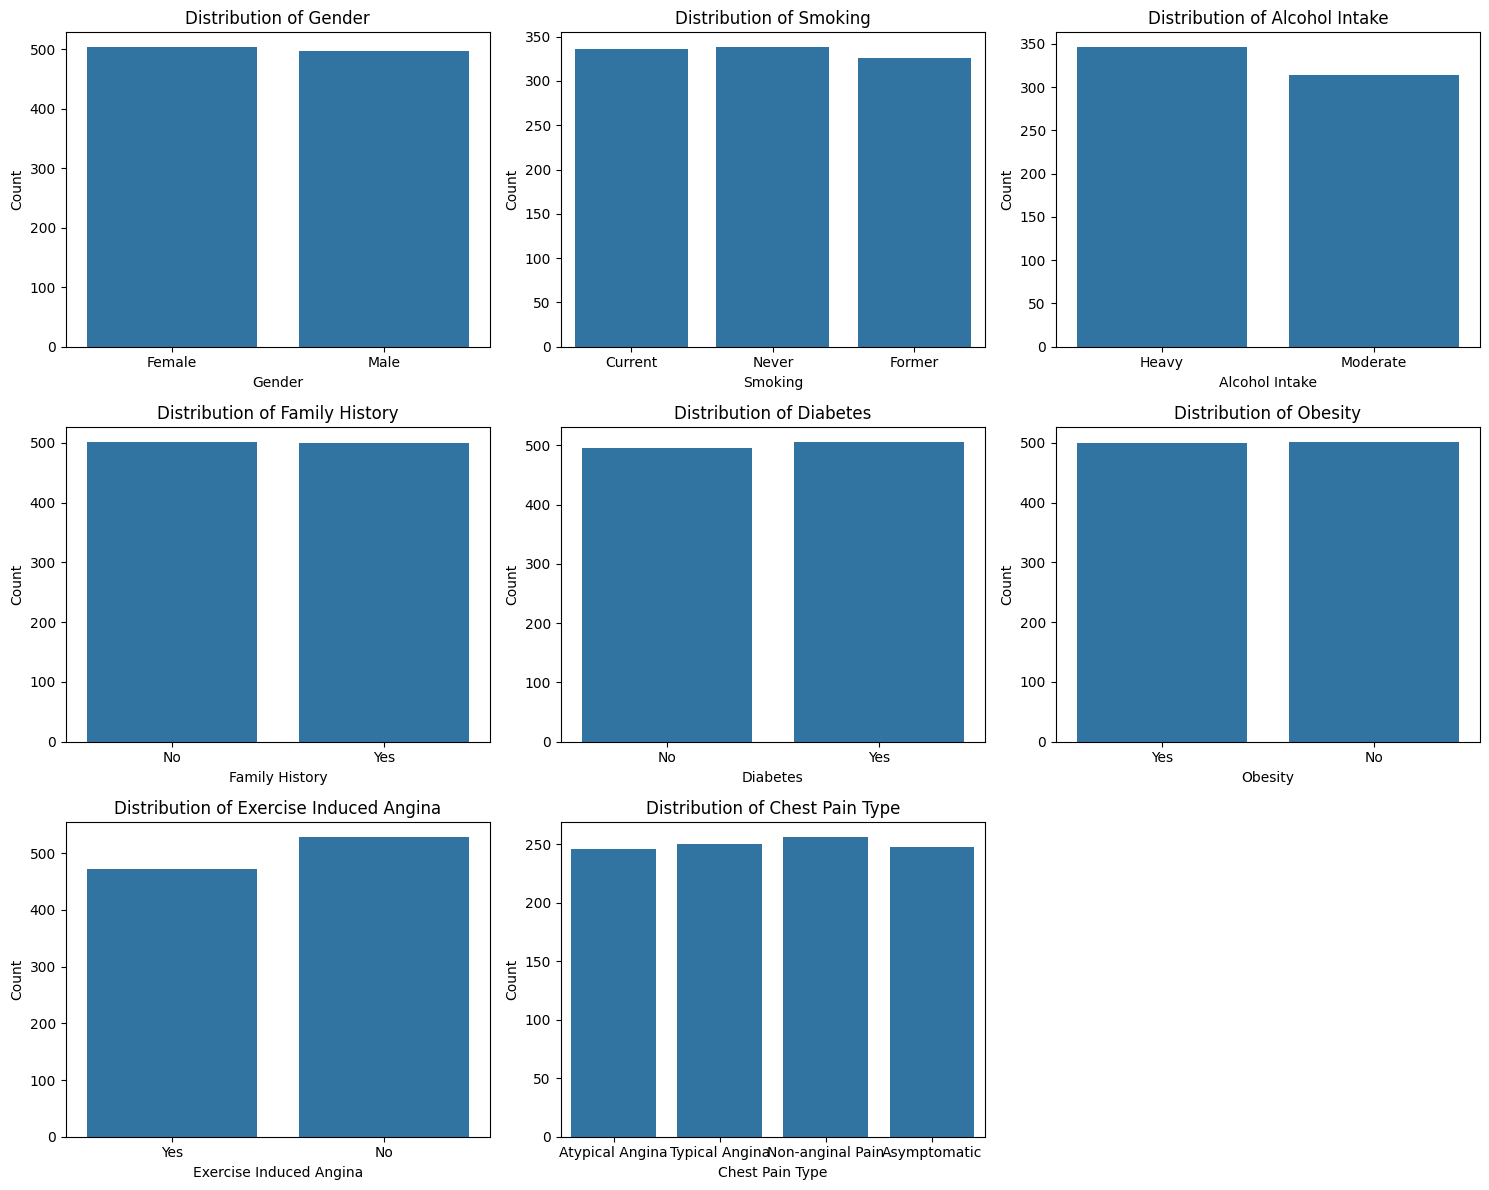

In [31]:
categorical_cols = ['Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina', 'Chest Pain Type']
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [33]:
# if male then setting the gender value to 1 and 0 if it is female

length = data["Gender"].size

for x in  range(0,length) :
    if data.loc[x,"Gender"] == "Male":
        data.loc[x,"Gender"] = 1
    else :
        data.loc[x,"Gender"] = 0

data["Gender"] = data["Gender"].astype("int64")

In [34]:
#  adding column ever_smoked ,  is_smoking where
#   (0,0) -> has never smoked
#   (1,0) -> has given up on smoking
#   (1,1) -> smokes
# removing smoking column

list_ever_smoked = []
list_is_smoking = []

for x in range(0,length):
    if data.loc[x,"Smoking"] == "Never":
        list_ever_smoked.append(0)
        list_is_smoking.append(0)
    elif data.loc[x,"Smoking"] == "Current" :
        list_ever_smoked.append(1)
        list_is_smoking.append(1)
    else :
        list_ever_smoked.append(1)
        list_is_smoking.append(0)

data = data.drop("Smoking",axis=1)

data.insert(5,"Ever_smoked",list_ever_smoked)
data.insert(6,"Is_smoking",list_is_smoking)



In [35]:
# adding column Non_driker and Heavy_drinker where
# (0,0) -> does not drink alcohol
# (1,0) -> drinks alcohol in moderate amount
# (1,1) -> heavy drinker

list_non_drinker = []
list_heavy_drinker = []

for x in range(0,length):
    if data.loc[x,"Alcohol Intake"] == "Heavy":
        list_non_drinker.append(1)
        list_heavy_drinker.append(1)
    elif data.loc[x,"Alcohol Intake"] == "Moderate" :
        list_non_drinker.append(1)
        list_heavy_drinker.append(0)
    else :
        list_non_drinker.append(0)
        list_heavy_drinker.append(0)

data = data.drop("Alcohol Intake",axis=1)

data.insert(7,"Non_drinker",list_non_drinker)
data.insert(8,"Heavy_drinker",list_heavy_drinker)


In [36]:
# if family history has a history of heart attack then it is set to 1
for x in  range(0,length) :
    if data.loc[x,"Family History"] == "Yes":
        data.loc[x,"Family History"] = 1
    else :
        data.loc[x,"Family History"] = 0

data["Family History"] = data["Family History"].astype("int64")

In [37]:
# if patient has Diabetes then it is set to 1
for x in  range(0,length) :
    if data.loc[x,"Diabetes"] == "Yes":
        data.loc[x,"Diabetes"] = 1
    else :
        data.loc[x,"Diabetes"] = 0

data["Diabetes"] = data["Diabetes"].astype("int64")

In [38]:
# if patient has Obesity then it is set to 1
for x in  range(0,length) :
    if data.loc[x,"Obesity"] == "Yes":
        data.loc[x,"Obesity"] = 1
    else :
        data.loc[x,"Obesity"] = 0

data["Obesity"] = data["Obesity"].astype("int64")

In [39]:
#droping chest pain type beacuse i do not have an idea what it is
data = data.drop("Chest Pain Type",axis=1)

In [40]:
# if the patient has exsercised induced angina then set it to one
for x in  range(0,length) :
    if data.loc[x,"Exercise Induced Angina"] == "Yes":
        data.loc[x,"Exercise Induced Angina"] = 1
    else :
        data.loc[x,"Exercise Induced Angina"] = 0

data["Exercise Induced Angina"] = data["Exercise Induced Angina"].astype("int64")

In [41]:
data.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Ever_smoked,Is_smoking,Non_drinker,Heavy_drinker,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Heart Disease
0,75,0,228,119,66,1,1,1,1,1,0,0,1,8,119,1,1
1,48,1,204,165,62,1,1,0,0,5,0,0,0,9,70,1,0
2,53,1,234,91,67,0,0,1,1,3,1,0,1,5,196,1,1
3,69,0,192,90,72,1,1,0,0,4,0,1,0,7,107,1,0
4,62,0,172,163,93,0,0,0,0,6,0,1,0,2,183,1,0


In [42]:
# data looks clean and ready for interpretation
column_to_compare = "Heart Disease"

# Iterate over columns
for col in data.columns:
    if col != column_to_compare:
        correlation = data[column_to_compare].corr(data[col])
        print(f"Correlation between '{column_to_compare}' and '{col}': {correlation:.2f}")

Correlation between 'Heart Disease' and 'Age': 0.65
Correlation between 'Heart Disease' and 'Gender': 0.03
Correlation between 'Heart Disease' and 'Cholesterol': 0.37
Correlation between 'Heart Disease' and 'Blood Pressure': 0.01
Correlation between 'Heart Disease' and 'Heart Rate': 0.01
Correlation between 'Heart Disease' and 'Ever_smoked': -0.05
Correlation between 'Heart Disease' and 'Is_smoking': 0.04
Correlation between 'Heart Disease' and 'Non_drinker': 0.01
Correlation between 'Heart Disease' and 'Heavy_drinker': -0.05
Correlation between 'Heart Disease' and 'Exercise Hours': -0.01
Correlation between 'Heart Disease' and 'Family History': 0.03
Correlation between 'Heart Disease' and 'Diabetes': 0.02
Correlation between 'Heart Disease' and 'Obesity': -0.02
Correlation between 'Heart Disease' and 'Stress Level': 0.01
Correlation between 'Heart Disease' and 'Blood Sugar': -0.01
Correlation between 'Heart Disease' and 'Exercise Induced Angina': 0.00


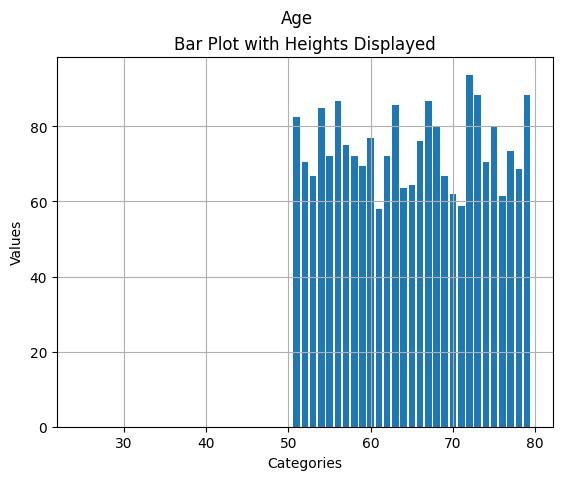

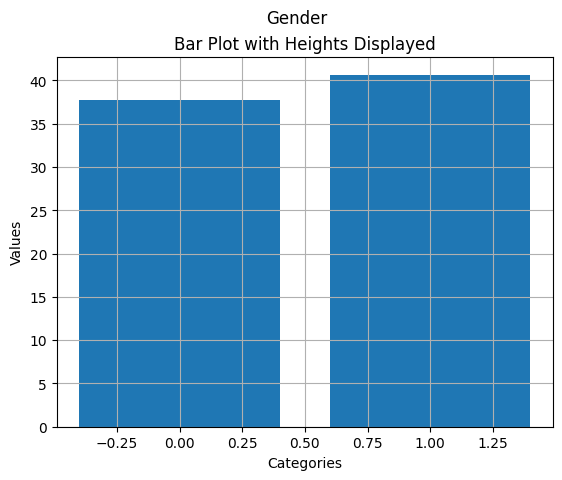

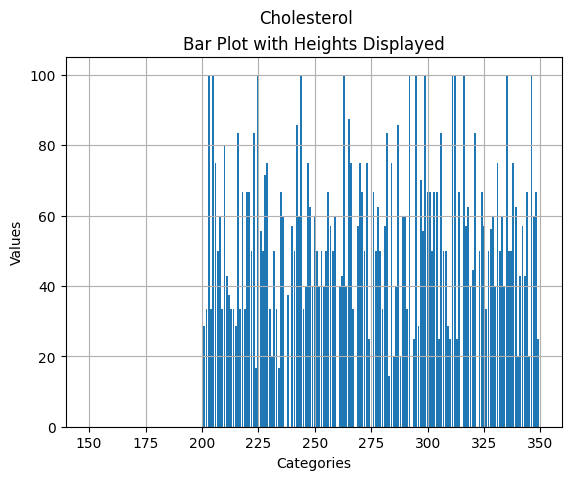

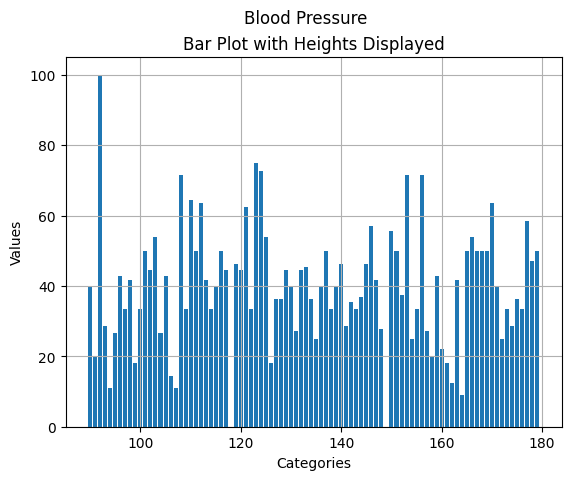

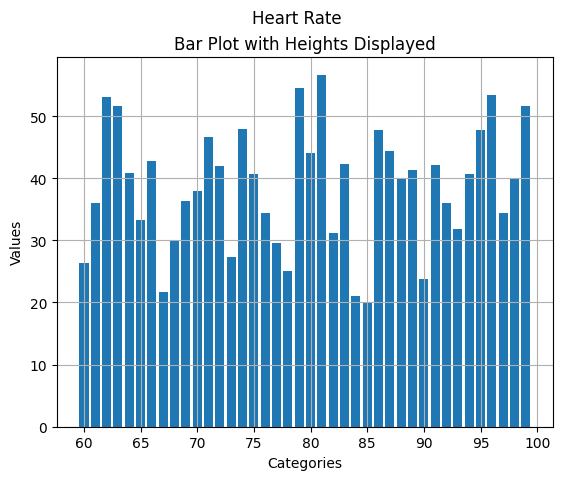

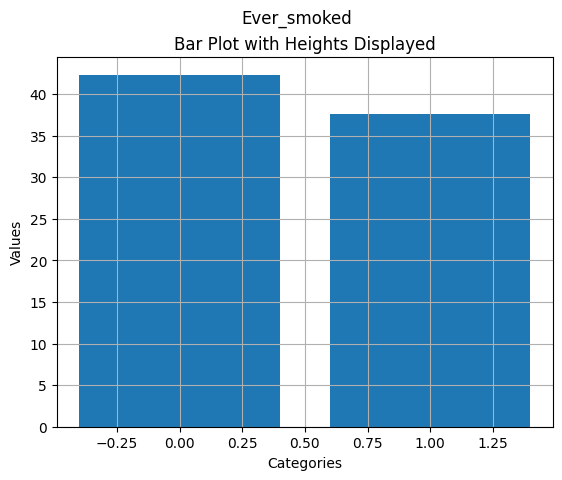

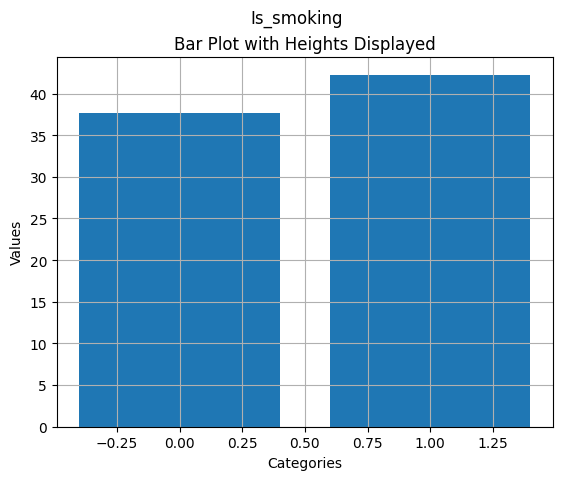

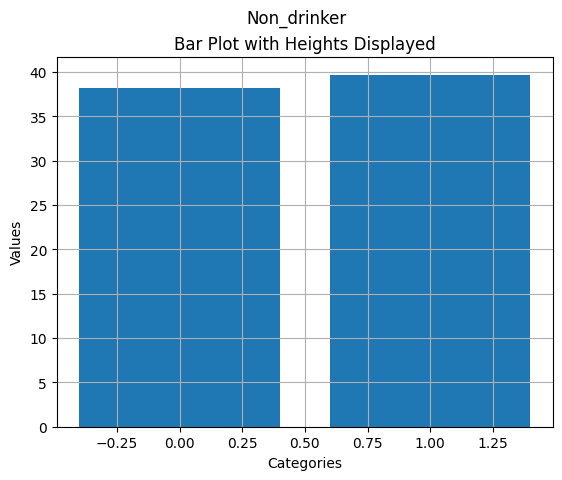

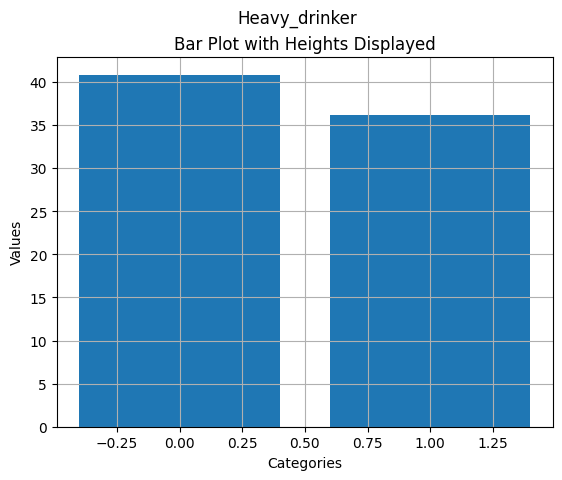

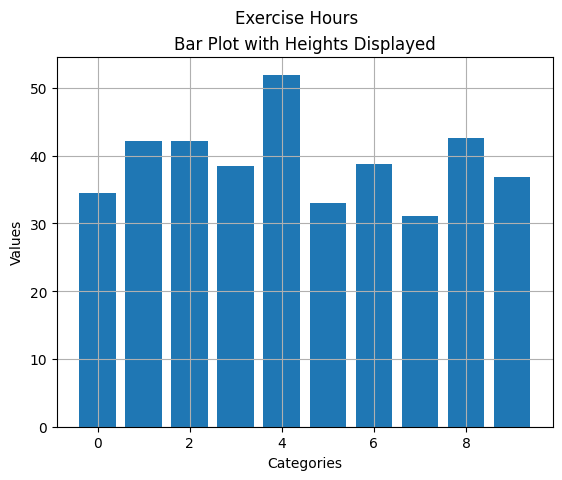

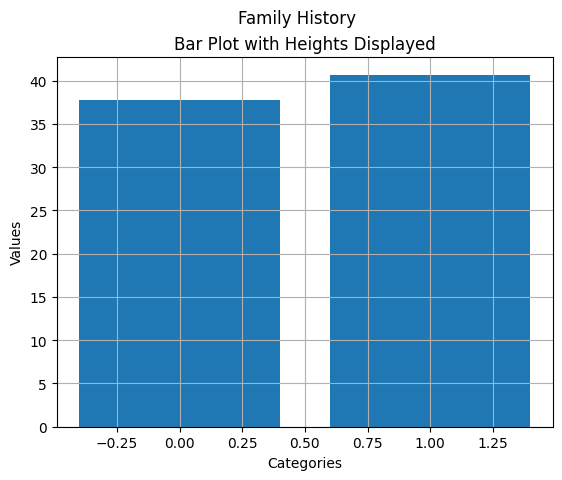

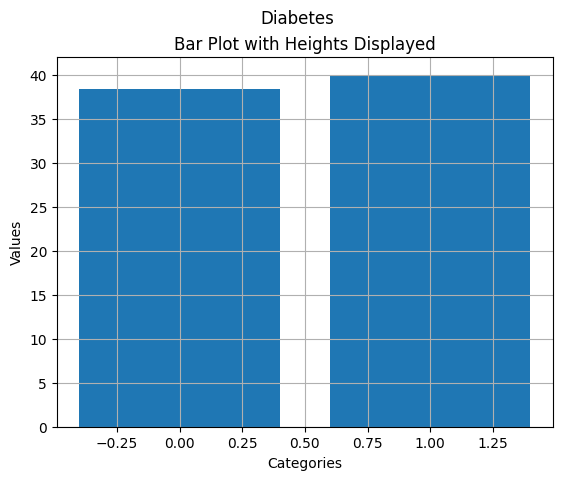

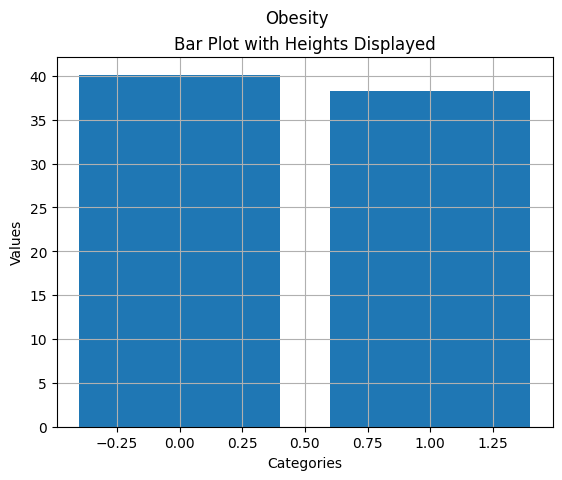

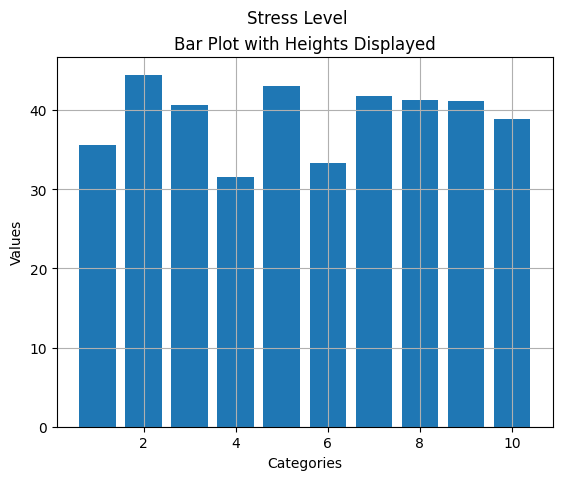

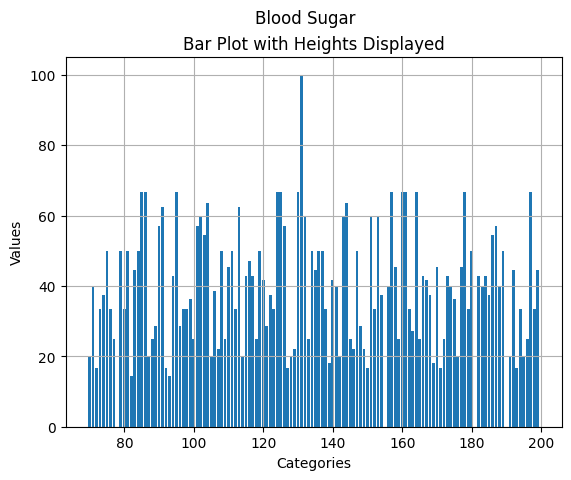

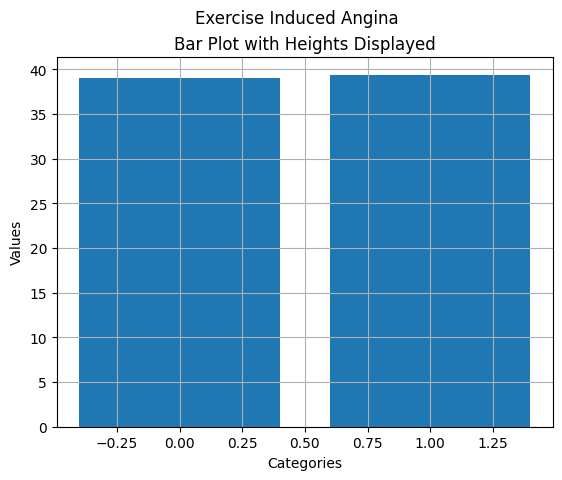

In [43]:
from collections import defaultdict

for x in data:
    if x != column_to_compare:
        dict_total = defaultdict(int)
        dict_disease = defaultdict(int)
        length = data[x].size
        for y in range(length):
            dict_total[data.loc[y,x]] += 1
            if data.loc[y,column_to_compare] == 1:
                dict_disease[data.loc[y,x]] += 1
        listx =[]
        listy=[]
        sorted(dict_total.items())
        sorted(dict_disease.items())
        for w in dict_total:
            listx.append(w)
            listy.append((dict_disease[w]/dict_total[w])*100)
        plt.figure()
        plt.suptitle(x)
        bars = plt.bar(listx, listy)

        plt.xlabel('Categories')
        plt.ylabel('Values')
        plt.title('Bar Plot with Heights Displayed')
        plt.grid(True)
        plt.show()



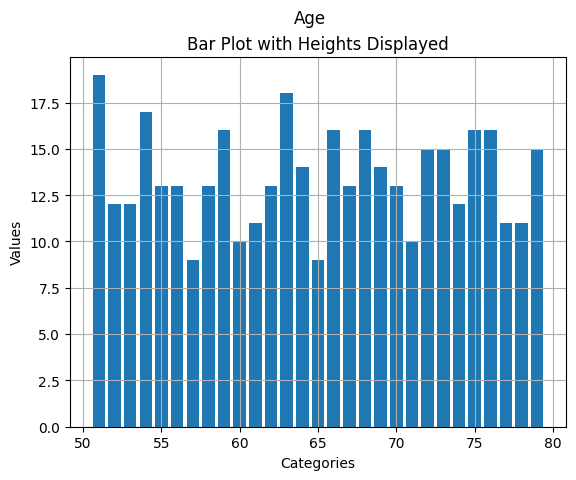

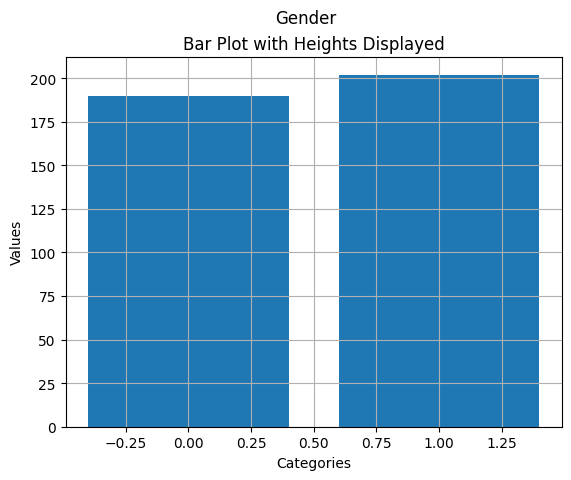

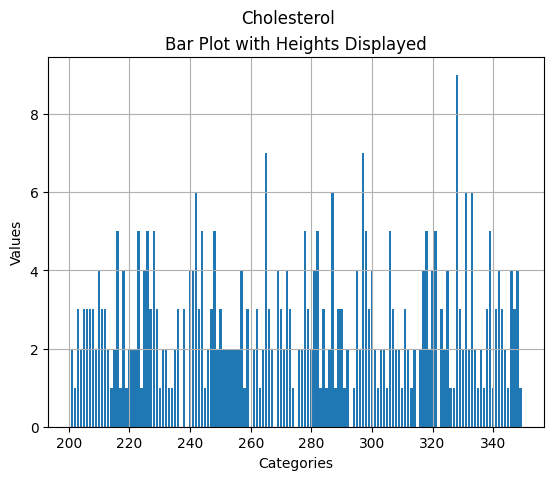

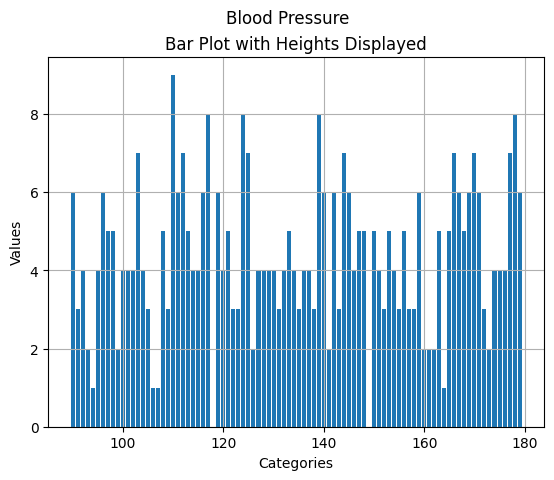

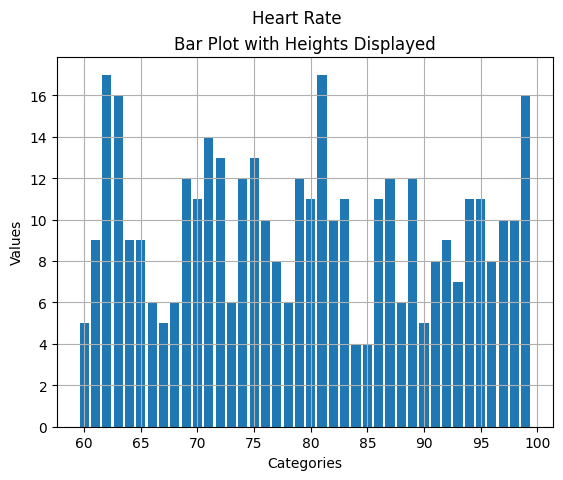

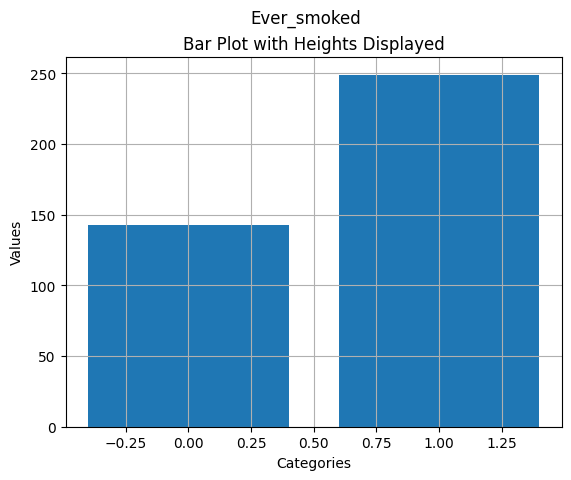

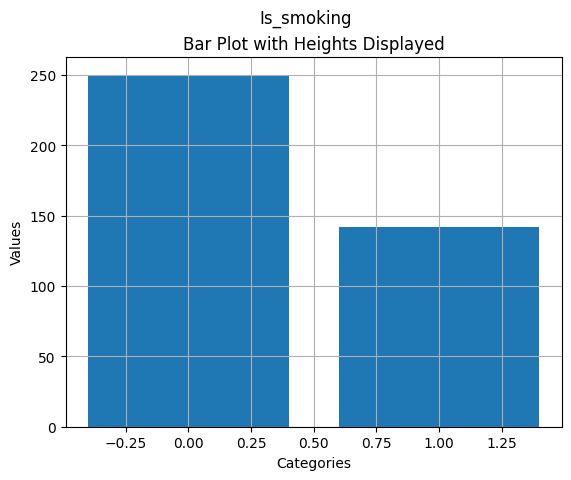

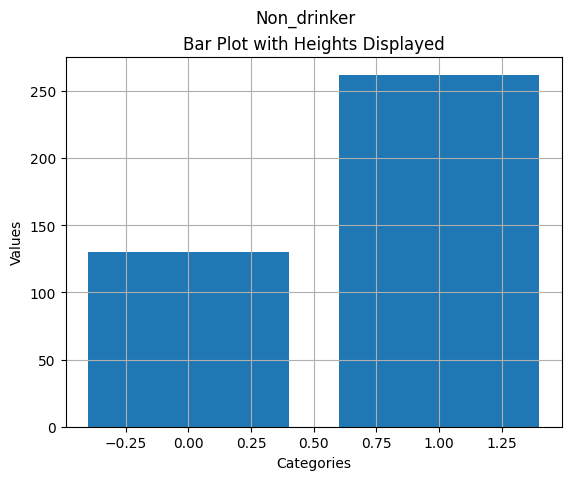

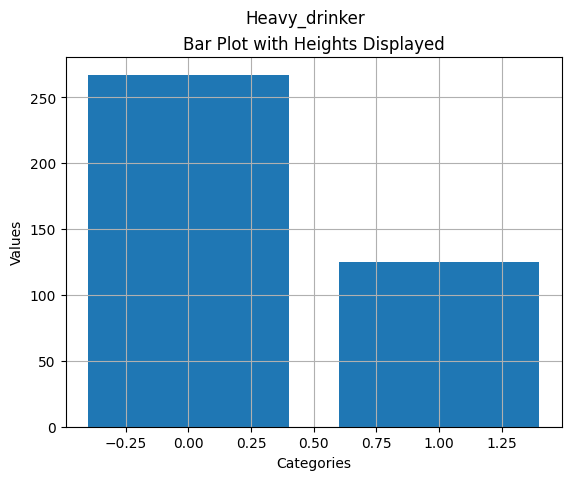

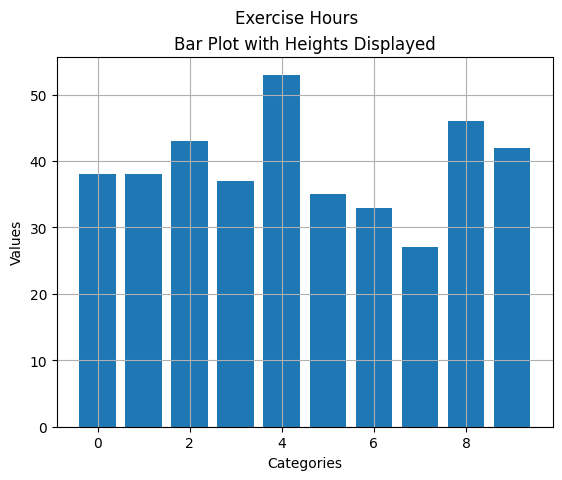

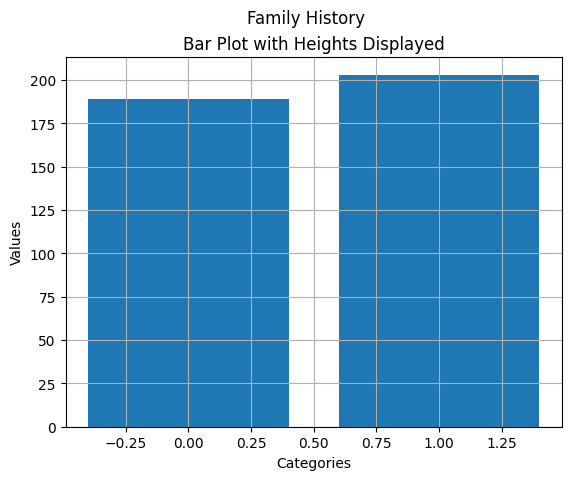

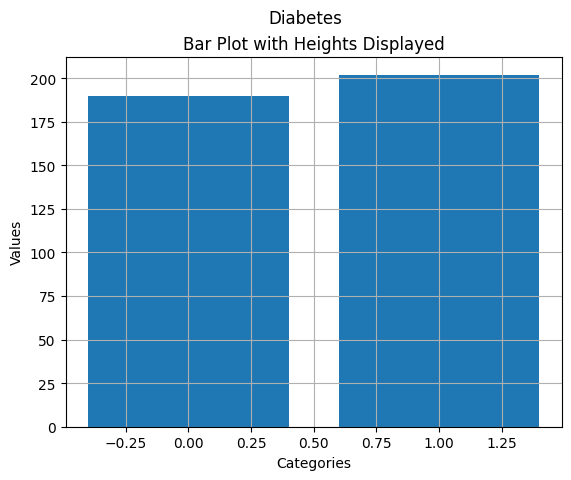

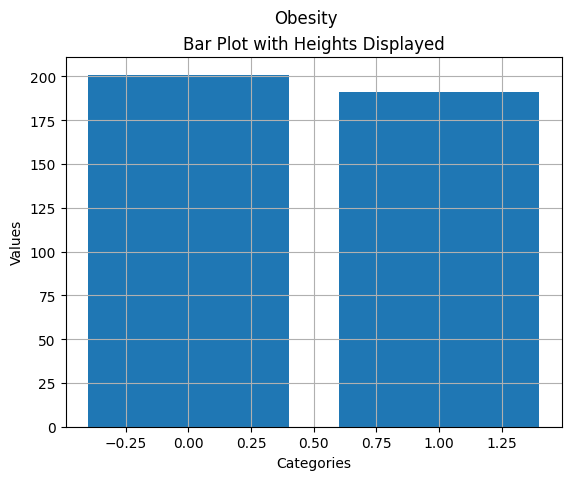

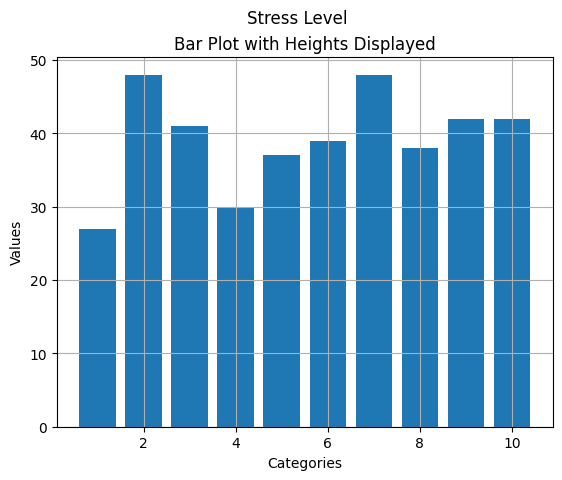

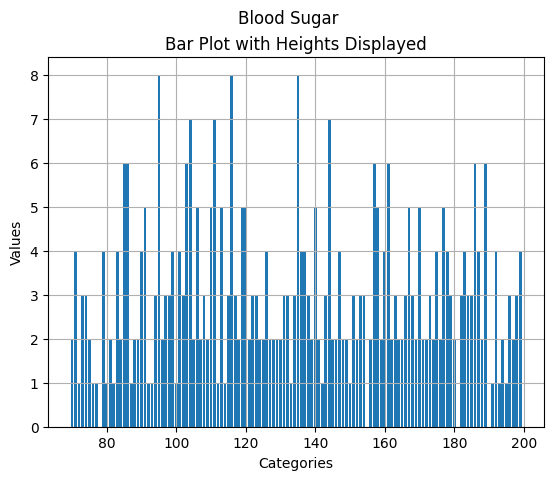

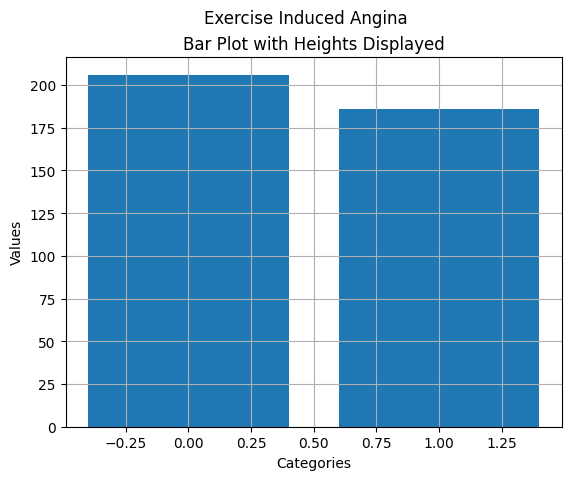

In [44]:
for x in data:
    if x != column_to_compare:
        dict_disease = defaultdict(int)
        length = data[x].size
        for y in range(length):
            if data.loc[y,column_to_compare] == 1:
                dict_disease[data.loc[y,x]] += 1
        listx =[]
        listy=[]
        sorted(dict_disease.items())
        for w in dict_disease:
            listx.append(w)
            listy.append(dict_disease[w])
        plt.figure()
        plt.suptitle(x)
        bars = plt.bar(listx, listy)
        plt.xlabel('Categories')
        plt.ylabel('Values')
        plt.title('Bar Plot with Heights Displayed')
        plt.grid(True)
        plt.show()

In [45]:
# we can see that young people does not have heart disease
# we can see that men are more prone to heart disease but only by a minor margin
# after certain cholesterol level you become prone to heart disease
# blood pressure has very little correlation with heart disease
# heart rate as like blood pressure has very little correlation
# rest of the data looks intutive as being obese,dibetic or having family history of heart disease increase chances of heart disease
# while non-smokers are more health quitting smoking also reduces chances of heart disease
# same with drinking
# while excising reduces chances of heart disease too much excising can be counter productive
# lower stress levels lead to healthier heart but there is not much correlation
# blood sugar level like blood pressure not a very good indicator of heart disease
# Exercise induced Angina also shows slight correlations

#hence removing blood pressure and blood sugar level

data = data.drop("Blood Sugar",axis=1)
data = data.drop("Blood Pressure",axis=1)

# we can now fit our model

In [46]:
data.head()

,Age,Gender,Cholesterol,Heart Rate,Ever_smoked,Is_smoking,Non_drinker,Heavy_drinker,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Exercise Induced Angina,Heart Disease
0,75,0,228,66,1,1,1,1,1,0,0,1,8,1,1
1,48,1,204,62,1,1,0,0,5,0,0,0,9,1,0
2,53,1,234,67,0,0,1,1,3,1,0,1,5,1,1
3,69,0,192,72,1,1,0,0,4,0,1,0,7,1,0
4,62,0,172,93,0,0,0,0,6,0,1,0,2,1,0


In [47]:
data.describe()


,Age,Gender,Cholesterol,Heart Rate,Ever_smoked,Is_smoking,Non_drinker,Heavy_drinker,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Exercise Induced Angina,Heart Disease
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,0.497000,249.939000,79.204000,0.662000,0.336000,0.660000,0.346000,4.529000,0.499000,0.505000,0.499000,5.646000,0.472000,0.392000
std,15.727126,0.500241,57.914673,11.486092,0.473265,0.472575,0.473946,0.475931,2.934241,0.500249,0.500225,0.500249,2.831024,0.499465,0.488441
min,25.000000,0.000000,150.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,39.000000,0.000000,200.000000,70.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,52.000000,0.000000,248.000000,79.000000,1.000000,0.000000,1.000000,0.000000,4.500000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000
75%,66.000000,1.000000,299.000000,89.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000
max,79.000000,1.000000,349.000000,99.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000


In [48]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1000 non-null   int64
 1   Gender                   1000 non-null   int64
 2   Cholesterol              1000 non-null   int64
 3   Heart Rate               1000 non-null   int64
 4   Ever_smoked              1000 non-null   int64
 5   Is_smoking               1000 non-null   int64
 6   Non_drinker              1000 non-null   int64
 7   Heavy_drinker            1000 non-null   int64
 8   Exercise Hours           1000 non-null   int64
 9   Family History           1000 non-null   int64
 10  Diabetes                 1000 non-null   int64
 11  Obesity                  1000 non-null   int64
 12  Stress Level             1000 non-null   int64
 13  Exercise Induced Angina  1000 non-null   int64
 14  Heart Disease            1000 non-null   int64
dtypes: in

In [49]:
# we will use random forest for classification 


data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data.head()

,Age,Gender,Cholesterol,Heart Rate,Ever_smoked,Is_smoking,Non_drinker,Heavy_drinker,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Exercise Induced Angina,Heart Disease
0,77,0,248,72,1,1,1,0,2,0,1,1,9,0,1
1,42,1,293,80,0,0,0,0,6,1,0,1,10,0,0
2,42,0,206,97,1,1,0,0,2,1,1,1,4,0,0
3,40,0,288,84,0,0,1,1,9,1,1,0,7,1,0
4,78,0,213,99,1,1,1,1,2,0,0,1,3,0,1


In [50]:
#splitting data

length = data["Heart Disease"].size
train_data_ori = data.iloc[:int(0.7*length),:]
test_data_ori = data.iloc[int(0.7*length):,:]

print(length)
print(train_data_ori["Age"].size)

1000
700


In [51]:
train_data_input = train_data_ori.iloc[:,:14]
train_data_answer = train_data_ori.iloc[:,14:]

test_data_input = test_data_ori.iloc[:,:14]
test_data_answer = test_data_ori.iloc[:,14:]
test_data_answer_list = []
for x in test_data_answer["Heart Disease"]:
    test_data_answer_list.append(x)

test_data_answer = test_data_answer_list

In [52]:
def result_cal (result,test_data_answer) :
    total = len(result)
    correct = 0
    false_positive = 0
    false_negative = 0

    for x in range(total):
        if result[x] == test_data_answer[x]:
            correct +=1
        elif result[x] == 1:
            false_negative +=1
        else:
            false_positive +=1
    
    print("total correct" , correct)
    print("false positive" , false_positive, "   " , (false_positive/total)*100)
    print("false negative" , false_negative ,"   " , (false_negative/total)*100)
    print("accuracy" , (correct/total)*100)

In [53]:
from sklearn.ensemble import RandomForestClassifier

# for x in range (5,100,1):

# n_estiamator selected as 10 and max_dept selected as 20
model = RandomForestClassifier(n_estimators=10,max_depth=20)
model.fit(train_data_input, train_data_answer)

result = model.predict(test_data_input)
result_cal(result,test_data_answer)
print()







total correct 299
false positive 1     0.33333333333333337
false negative 0     0.0
accuracy 99.66666666666667



c:\Users\anshm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [54]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)